In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_15504\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.tail(5)

,Time/sec,Potential/V,Current/A,Charge/C
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242
1048570,######.#,3.99859,1.24721,-330.907


In [4]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


# Data Cleaning

In [5]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [6]:
df.isnull().sum()

Time         0
Potential    0
Current      0
Charge       0
dtype: int64

In [7]:
df.loc[df['Time'].isnull()]  # there are the values where we are getting null values

,Time,Potential,Current,Charge


In [8]:
# df.drop(df.index[350014],axis = 0, inplace = True)

In [9]:
# df.drop(df.index[719168],axis = 0, inplace = True)

In [10]:
# df.drop(df.index[827997],axis = 0, inplace = True)

In [11]:
# df.fillna(value=0, inplace=True)  # for filling the nan values

In [12]:
# df.isnull().sum()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Time       1048571 non-null  object 
 1   Potential  1048571 non-null  float64
 2   Current    1048571 non-null  float64
 3   Charge     1048571 non-null  float64
dtypes: float64(3), object(1)
memory usage: 32.0+ MB


In [14]:
df.shape

(1048571, 4)

In [15]:
df.loc[df['Time']=='######.#']  # checking for the string values 

,Time,Potential,Current,Charge
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [16]:
# df.drop(['Time'], axis=1,inplace=True)  # deleting the Time column

In [17]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [18]:
# df.drop(df['Time/sec'],axis = 1, inplace=True)

In [19]:
df['Time'].iloc[994870]

'999991.6'

In [20]:
df.shape

(994879, 4)

In [21]:
df.tail(10)

,Time,Potential,Current,Charge
994869,999990.6,4.17938,0.0,2964.88
994870,999991.6,4.17938,0.0,2964.88
994871,999992.6,4.17937,0.0,2964.88
994872,999993.6,4.17938,0.0,2964.88
994873,999994.6,4.17938,0.0,2964.88
994874,999995.6,4.17937,0.0,2964.88
994875,999996.6,4.17937,0.0,2964.88
994876,999997.6,4.17937,0.0,2964.88
994877,999998.6,4.17936,0.0,2964.88
994878,999999.6,4.17936,0.0,2964.88


In [22]:
df.insert(loc=3,column='Capacity',value = df['Charge']/3600)  # Adding the column

In [23]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

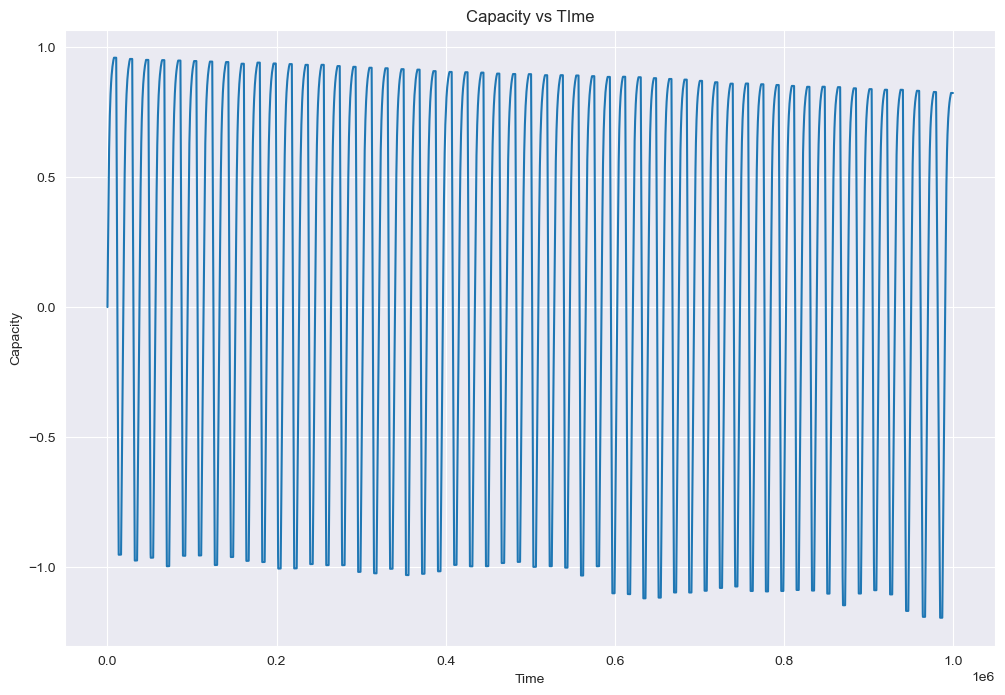

In [25]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Time'],df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


CPU times: total: 3min 42s
Wall time: 3min 44s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

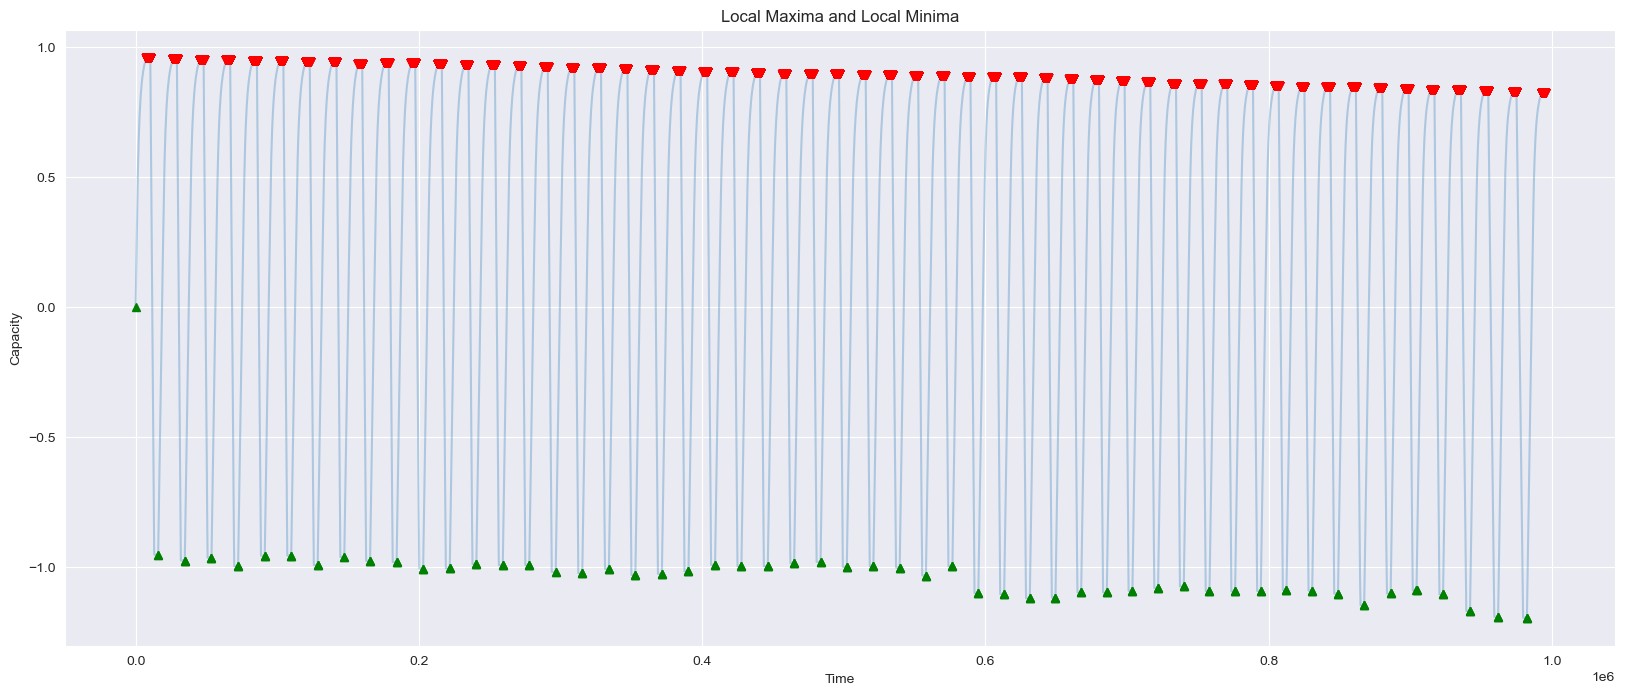

In [27]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [28]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [29]:
print(maximum_point)
print('Maximum Point is - ',maximum_point.max())
print(minimum_point)
print('Minimum Point is - ',minimum_point.min())

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
Maximum Point is -  0.9593194444444445
[ 0.         -0.95302222 -0.97546389 -0.96463333 -0.99741667 -0.95675833
 -0.95597778 -0.99267778 -0.96201111 -0.97678611 -0.98126111 -1.00638611
 -1.00568333 -0.989225   -0.99324167 -0.99336111 -1.01925278 -1.024275
 -1.00729444 -1.03115278 -1.02656667 -1.01694444 -0.99236667 -0.99746111
 -0.99722778 -0.98508056 -0.98075833 -0.99984722 -0.99675556 -1.002

Text(0.5, 1.0, 'Dataset')

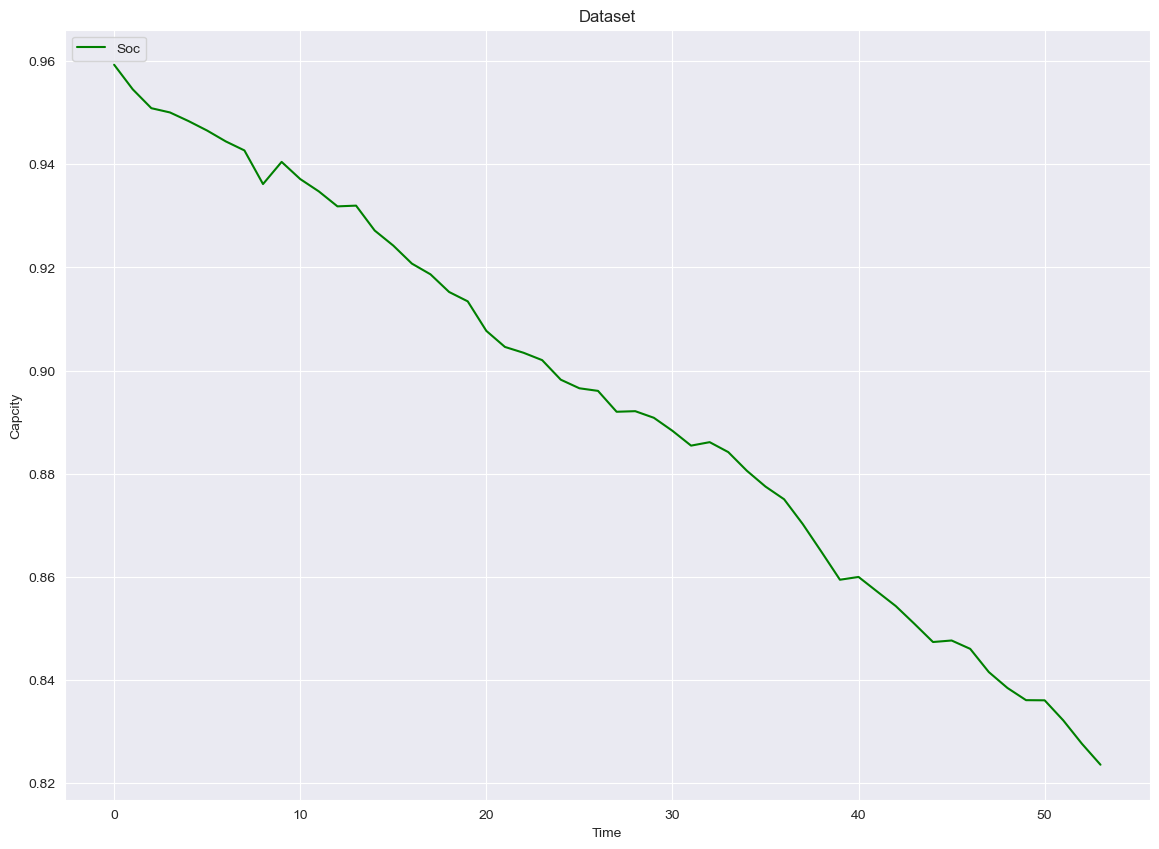

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
plt.plot(maximum_point,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [31]:
df.insert(loc = 4,column ='Energy',value=df['Capacity']*df["Potential"])

In [32]:
df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [33]:
df.insert(loc=6,column='SOC',value = df['Capacity']/0.96)

In [34]:
df.head(20)

,Time,Potential,Current,Capacity,Energy,Power,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,4.919672,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000896,4.922976,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.002374,4.926784,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.003663,4.930054,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.005131,4.932712,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.006422,4.934993,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.007893,4.937194,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.009185,4.939061,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.010657,4.940910,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.011952,4.942605,0.003143,10.86290


ValueError: x and y must have same first dimension, but have shapes (994879,) and (54,)

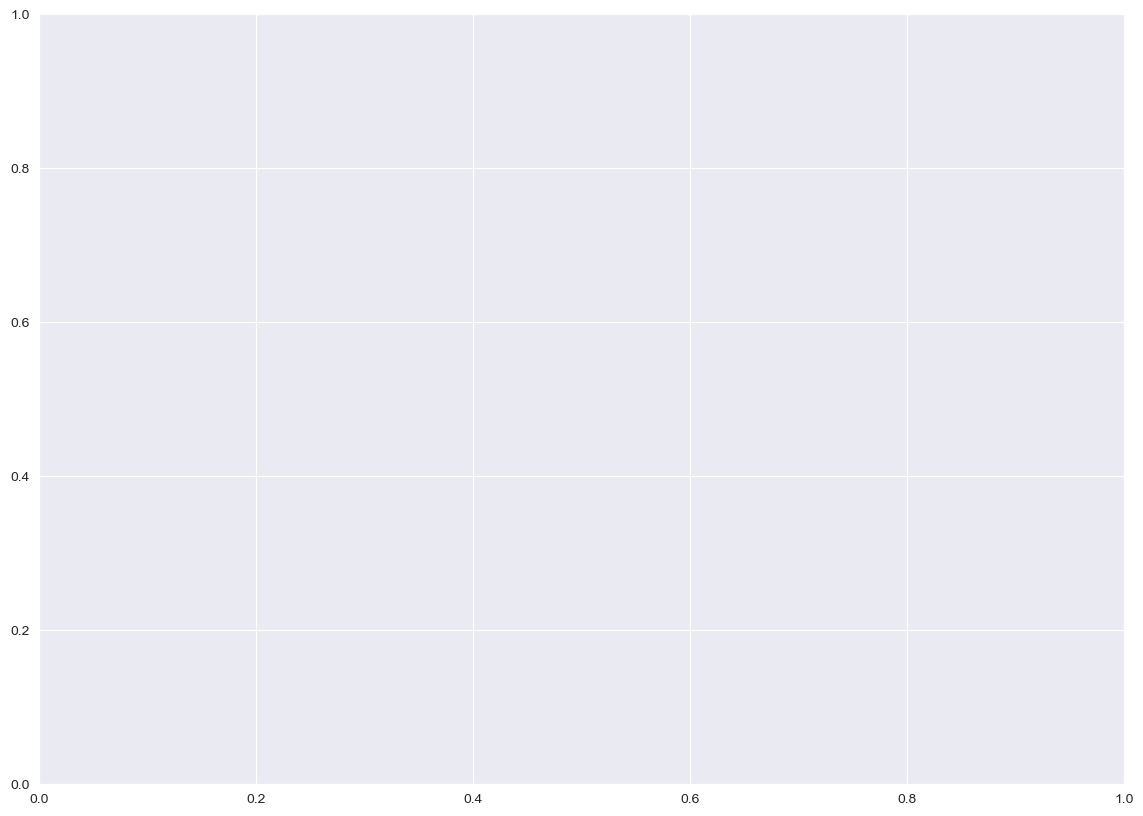

In [57]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
just_plot = maximum_point/0.96
plt.plot(df['Time'],just_plot,color='green')
plt.ylabel('SOC')
plt.xlabel('Time')
plt.legend(["Soc"], loc ="upper left")
plt.title('Dataset')

Text(0.5, 1.0, 'Capacity vs TIme')

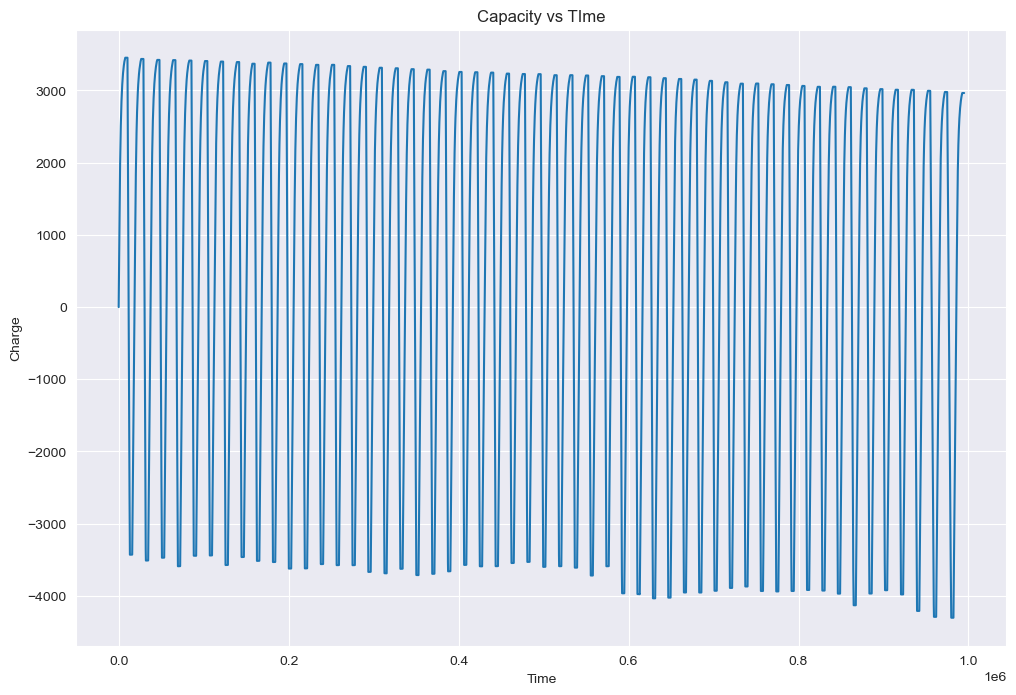

In [36]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Charge'])
plt.ylabel('Charge')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Energy     994879 non-null  float64
 5   Power      994879 non-null  float64
 6   SOC        994879 non-null  float64
 7   Charge     994879 non-null  float64
dtypes: float64(8)
memory usage: 60.7 MB


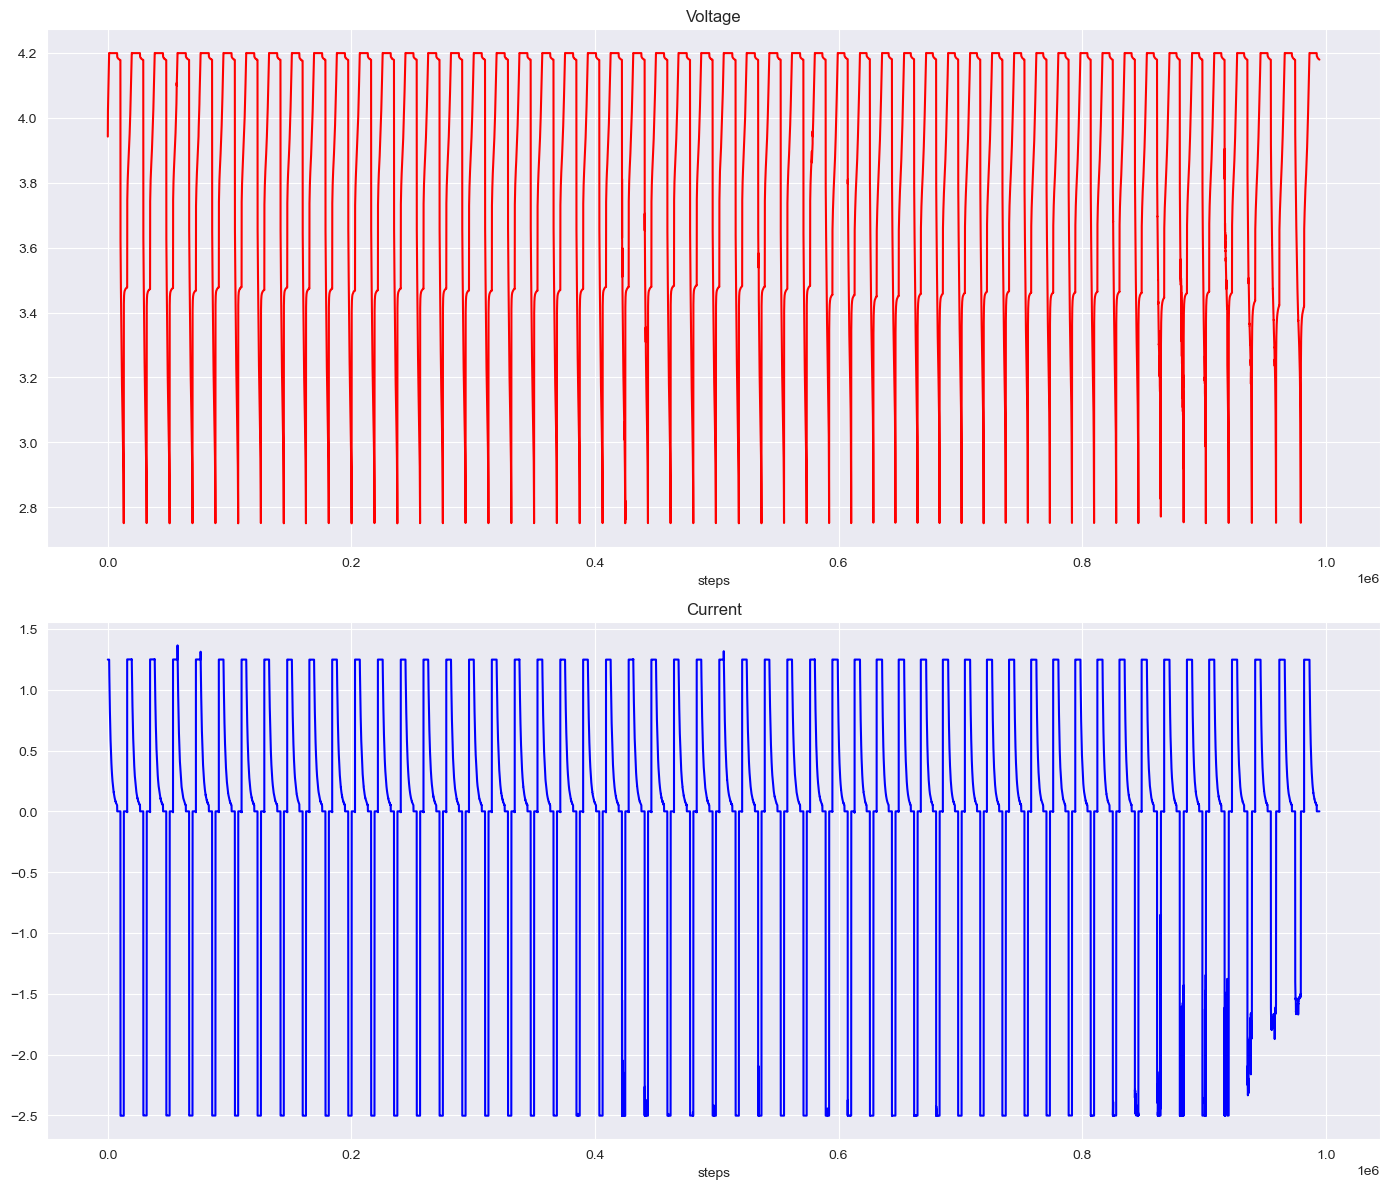

In [38]:
plt.figure(figsize =(14,12))
plt.subplot(2,1,1)
plt.plot(df["Potential"],'r')
plt.xlabel('steps')
plt.title("Voltage")
plt.subplot(2,1,2)
plt.plot(df["Current"],'b')
plt.xlabel('steps')
plt.title("Current")
plt.tight_layout()
plt.show()

# Finding Integral value of SOC

In [39]:
from scipy.integrate import cumulative_trapezoid

In [40]:
df.shape[0]

994879

In [41]:
p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

In [42]:
integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

In [43]:
df.loc[:, "Integral_soc"] = integral

Text(0.5, 1.0, 'Trial Dataset')

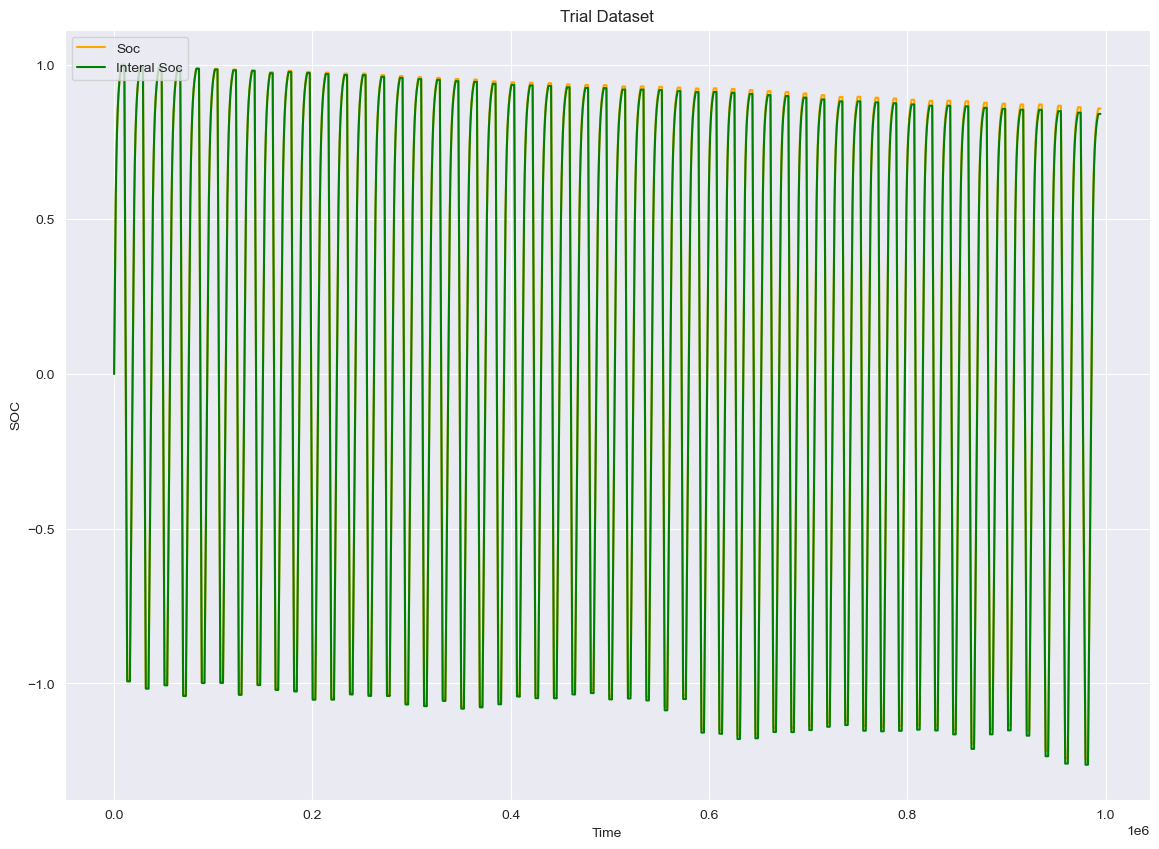

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_soc'],color='green')
plt.ylabel('SOC')
plt.xlabel('Time')
plt.legend(["Soc", "Interal Soc"], loc ="upper left")
plt.title('Trial Dataset')

In [45]:
df.isnull().sum()

Time            0
Potential       0
Current         0
Capacity        0
Energy          0
Power           0
SOC             0
Charge          0
Integral_soc    0
dtype: int64

In [46]:
df.shape

(994879, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          994879 non-null  float64
 1   Potential     994879 non-null  float64
 2   Current       994879 non-null  float64
 3   Capacity      994879 non-null  float64
 4   Energy        994879 non-null  float64
 5   Power         994879 non-null  float64
 6   SOC           994879 non-null  float64
 7   Charge        994879 non-null  float64
 8   Integral_soc  994879 non-null  float64
dtypes: float64(9)
memory usage: 68.3 MB


In [48]:
df.describe()

,Time,Potential,Current,Capacity,Energy,Power,SOC,Charge,Integral_soc
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.791004,0.285109,0.152622,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,2.873298,3.993079,0.783926,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-4.306315,-9.777741,-1.244881,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-2.131484,0.000000,-0.627745,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,1.808352,0.303331,0.474152,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,3.514851,3.339343,0.874900,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,4.028483,5.730082,0.999291,3453.550000,0.999371


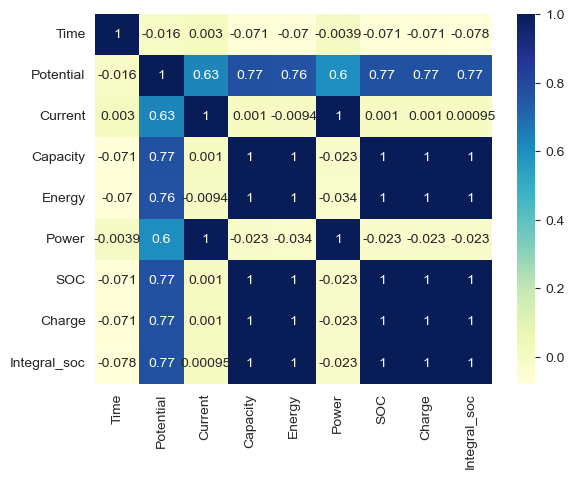

<Figure size 1400x1000 with 0 Axes>

In [49]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

<Figure size 1000x1000 with 0 Axes>

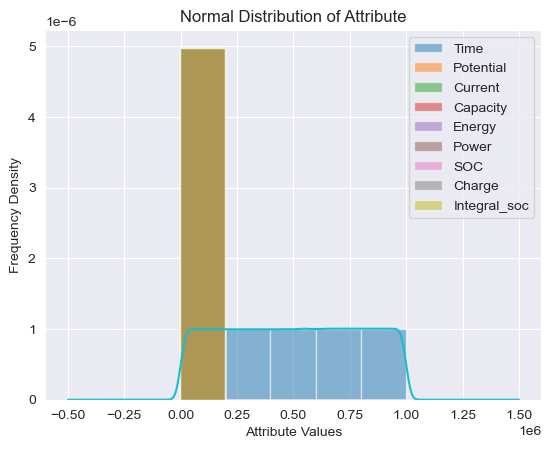

In [50]:
plt.figure(figsize=(10,10))
ax = df.plot(kind='hist', bins=5, density=True, alpha=0.5)
df['Time'].plot(kind='kde', ax=ax)
plt.title('Normal Distribution of Attribute')
plt.xlabel('Attribute Values')
plt.ylabel('Frequency Density')

# Display the plot
plt.show()

# Gettting the Details of High and low peak datavalues

In [51]:
high_peak = df[df['Capacity']==maximum_point.max()]
high_peak

,Time,Potential,Current,Capacity,Energy,Power,SOC,Charge,Integral_soc
7647,7647.0,4.19641,0.033329,0.959319,4.025698,0.139861,0.999291,3453.55,0.999366
7648,7648.0,4.19040,0.000000,0.959319,4.019932,0.000000,0.999291,3453.55,0.999371
7649,7649.0,4.19028,0.000000,0.959319,4.019817,0.000000,0.999291,3453.55,0.999371
7650,7650.0,4.19021,0.000000,0.959319,4.019750,0.000000,0.999291,3453.55,0.999371
7651,7651.0,4.19014,0.000000,0.959319,4.019683,0.000000,0.999291,3453.55,0.999371
...,...,...,...,...,...,...,...,...,...
10343,10343.0,4.17794,0.000000,0.959319,4.007979,0.000000,0.999291,3453.55,0.999371
10344,10344.0,4.17794,0.000000,0.959319,4.007979,0.000000,0.999291,3453.55,0.999371
10345,10345.0,4.17794,0.000000,0.959319,4.007979,0.000000,0.999291,3453.55,0.999371
10346,10346.0,4.17794,0.000000,0.959319,4.007979,0.000000,0.999291,3453.55,0.999371


In [52]:
low_peak = df[df['Capacity']==minimum_point.min()]

In [53]:
low_peak

,Time,Potential,Current,Capacity,Energy,Power,SOC,Charge,Integral_soc
982296,987417.7,3.41852,0.00000,-1.195086,-4.085426,0.000000,-1.244881,-4302.31,-1.262688
982297,987417.8,3.41854,0.00000,-1.195086,-4.085450,0.000000,-1.244881,-4302.31,-1.262688
982298,987418.5,3.57092,1.24721,-1.195086,-4.267557,4.453687,-1.244881,-4302.31,-1.262562


In [54]:
# saving the dataframe to csv file in Device 
high_peak.to_csv('D:\IIT Delhi\high_peak.csv', index=False)
low_peak.to_csv('D:\IIT Delhi\low_peak.csv', index=False)

# Function for AIC

In [55]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())